## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [4]:
## Import necessary libraries
!pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 466.4 kB/s eta 0:11:51
   ---------------------------------------- 0.5/331.9 MB 466.4 kB/s eta 0:11:51
   ---------------------------------------- 0.5/331.9 MB 466.4 kB/s eta 0:11:51
   ---------------------------------------- 0.5/331.9 MB 466.4 kB/s eta 0:11:51
   ---------------------------------------- 0.8/331.9 MB 372.9 kB/s eta 0:14:48
   ---------------------------------------- 0.8/331.9 MB 372.9 kB/s eta 0:14:48
   ---------------------------------------- 0.8/331.9 MB 372.9 kB/s eta 0:14:48
   -----------

In [5]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)
    
    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])
    
    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (1000, 50, 1)
Output shape: (1000,)


In [6]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

c:\Users\harit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3072 - val_loss: 0.1097
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0294 - val_loss: 0.0028
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 8.4975e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2865e-04 - val_loss: 4.0956e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1876e-04 - val_loss: 2.4708e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8387e-04 - val_loss: 1.1592e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1492e-05 - val_loss: 6.0024e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6742e-05 - val_loss: 2.2414e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4370e-05 - val_loss: 8.7584e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2579e-06 - val_loss: 3.6194e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.6451e-06 - val_loss: 2.0179

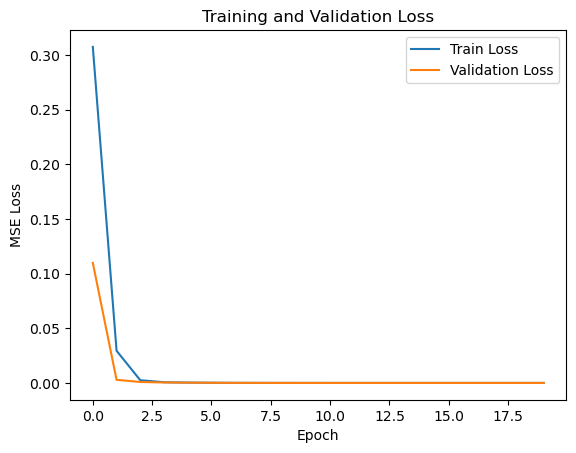

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


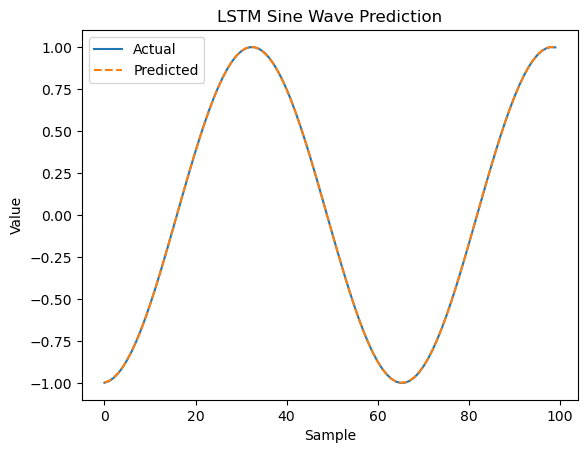

In [9]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

- #### Observations:

1. Import all the required libraries to build a LSTM model
2. The code generates synthetic sine wave data for sequence regression,used to train LSTM models. It creates a sine wave, then slices it into overlapping sequences of a fixed length (seq_length) to form input samples (X) and corresponding next-step targets (y). Each input sequence contains seq_length consecutive sine values, while the target is the immediate next value in the wave. Finally, it reshapes X to fit the LSTM input format [samples, time_steps, features].
3. It builds a simple LSTM model for predicting the next value in sequence.Adam optimizer used to train neural networks beacause of its adaptive learning.
4. Model is trained and graph is plotted to see training and validation loss values
5. we make prediction and draw a graph with actual values and predicted values. the plot shows that all the predicted values are correct.